/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


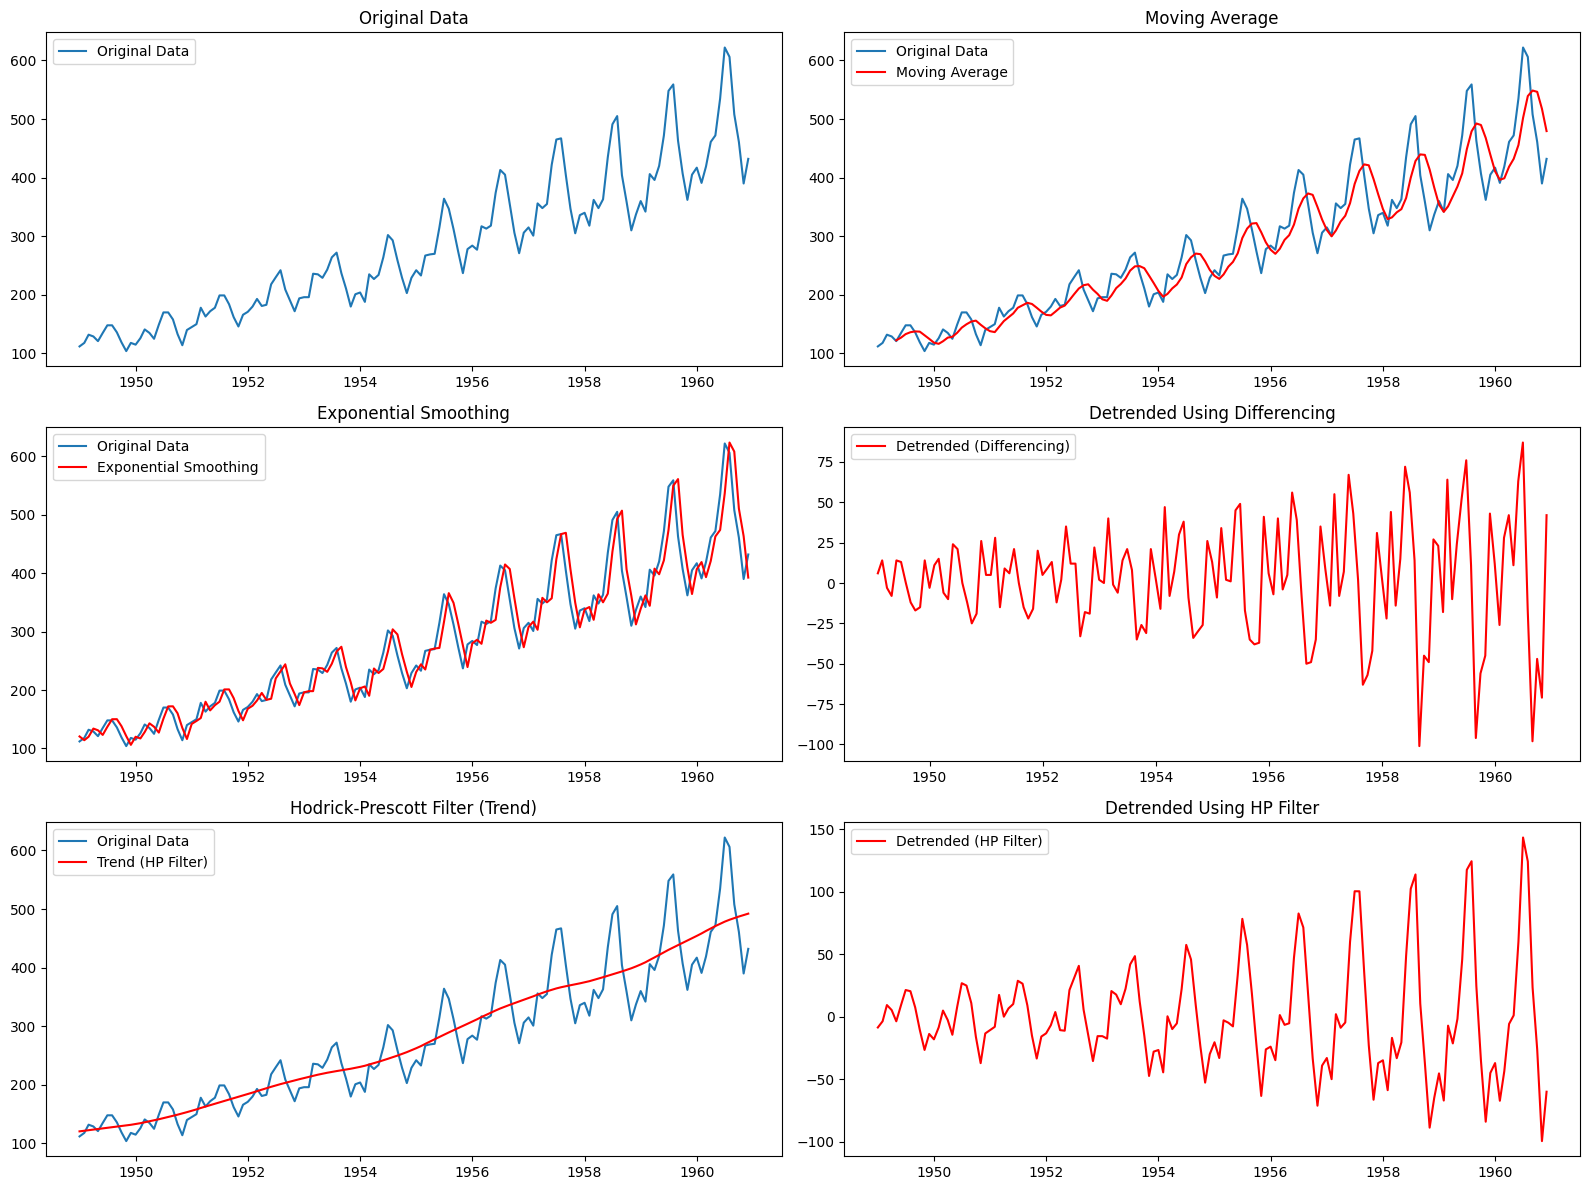

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.filters.hp_filter import hpfilter

# Load the CSV dataset
data = pd.read_csv('/content/AirPassengers.csv')

# Convert 'Months' column to datetime format
data['Month'] = pd.to_datetime(data['Month'])

# Set 'Months' as the index
data.set_index('Month', inplace=True)

# Ensure the '#Passengers' column is numeric
data['#Passengers'] = pd.to_numeric(data['#Passengers'], errors='coerce')

# 1. Moving Average (Aggregation)
window_size = 5
moving_avg = data['#Passengers'].rolling(window=window_size).mean()

# 2. Exponential Smoothing
model = ExponentialSmoothing(data['#Passengers'], trend='add', seasonal=None)
fitted = model.fit()

# 3. Differencing (Detrending)
detrended_diff = data['#Passengers'].diff().dropna()
cycle, trend_hp = hpfilter(data['#Passengers'], lamb=1600)
detrended_hp = data['#Passengers'] - trend_hp

plt.figure(figsize=(16, 12))

# Original Data
plt.subplot(3, 2, 1)
plt.plot(data.index, data['#Passengers'], label='Original Data')
plt.title('Original Data')
plt.legend()

# Moving Average
plt.subplot(3, 2, 2)
plt.plot(data.index, data['#Passengers'], label='Original Data')
plt.plot(data.index, moving_avg, label='Moving Average', color='red')
plt.title(f'Moving Average')
plt.legend()

# Exponential Smoothing
plt.subplot(3, 2, 3)
plt.plot(data.index, data['#Passengers'], label='Original Data')
plt.plot(data.index, fitted.fittedvalues, label='Exponential Smoothing', color='red')
plt.title('Exponential Smoothing')
plt.legend()

# Differencing (Detrending)
plt.subplot(3, 2, 4)
plt.plot(detrended_diff.index, detrended_diff, label='Detrended (Differencing)', color='red')
plt.title('Detrended Using Differencing')
plt.legend()

# HP Filter - Trend Component
plt.subplot(3, 2, 5)
plt.plot(data.index, data['#Passengers'], label='Original Data')
plt.plot(data.index, trend_hp, label='Trend (HP Filter)', color='red')
plt.title('Hodrick-Prescott Filter (Trend)')
plt.legend()

# HP Filter - Detrended Component
plt.subplot(3, 2, 6)
plt.plot(data.index, detrended_hp, label='Detrended (HP Filter)', color='red')
plt.title('Detrended Using HP Filter')
plt.legend()

plt.tight_layout()
plt.show()
